In [ ]:
import gensim
import numpy as np
from tqdm import tqdm

from gensim.models import KeyedVectors
from gensim.test.utils import datapath

In [ ]:
import gensim.downloader as api

glove_model = api.load("glove-wiki-gigaword-200")  # download the model and return as object ready for use

In [ ]:
law2vec_model = KeyedVectors.load_word2vec_format(datapath('/content/Law2Vec.200d.txt'))

## Words from Law2Vec paper

In [ ]:
words = [
    'article',
    'act',
    'action',
    'crime',
    'felony',
    'punishment',
    'security',
    'fraud',
    'privacy',
    'intellectual',
    'terrorism',
    'immigrant',
    'illegal',
    'drugs',
    'appeal',
    'abuse',
    'alcohol',
    'complaint',
    'indictment',
    'motion'
]

In [ ]:
for word in words:
    print('Word:', word)
    glove_sim = glove_model.most_similar(word, topn=5)
    sim = []
    for _ in glove_sim:
        sim.append(_[0])
    print('GloVe sim:', ", ".join(sim))
    law2vec_sim = law2vec_model.most_similar(word, topn=5)
    sim = []
    for _ in law2vec_sim:
        sim.append(_[0])
    print('Law2Vec sim:', ", ".join(sim))
    print('--------------------------------')

Word: article
GloVe sim: articles, published, page, publication, magazine
Law2Vec sim: convention, section, articles, clause, provisions
--------------------------------
Word: act
GloVe sim: acts, law, laws, legislation, enacted
Law2Vec sim: statute, §, provision, mccarranferguson, irca
--------------------------------
Word: action
GloVe sim: actions, response, any, move, measures
Law2Vec sim: suit, actions, lawsuit, claim, proceeding
--------------------------------
Word: crime
GloVe sim: criminal, crimes, murder, trafficking, murders
Law2Vec sim: offense, murder, crimes, felony, violent
--------------------------------
Word: felony
GloVe sim: misdemeanor, felonies, counts, larceny, offenses
Law2Vec sim: offense, misdemeanor, felonies, offenses, convicted
--------------------------------
Word: punishment
GloVe sim: punishments, sentence, imprisonment, meted, harsher
Law2Vec sim: penalty, punishments, sentencing, sentence, imprisonment
--------------------------------
Word: security
Gl

## Cosine similarity between word pairs

In [ ]:
word_pairs = [("sentence", "writing"), ("sentence", "reading"), ("sentence", "death"), ("punishment", "death")]

for pair in word_pairs:
    print('Word pair:', pair)
    print('GloVe sim:', glove_model.similarity(pair[0], pair[1]))
    print('Law2Vec sim:', law2vec_model.similarity(pair[0], pair[1]))
    print('--------------------------------')

Word pair: ('sentence', 'writing')
GloVe sim: 0.3328908
Law2Vec sim: 0.18039155
--------------------------------
Word pair: ('sentence', 'reading')
GloVe sim: 0.28644454
Law2Vec sim: 0.32588926
--------------------------------
Word pair: ('sentence', 'death')
GloVe sim: 0.549144
Law2Vec sim: 0.66504353
--------------------------------
Word pair: ('punishment', 'death')
GloVe sim: 0.5102307
Law2Vec sim: 0.50701135
--------------------------------


## WMD between Document pairs

In [ ]:
doc_pairs = [
    ("I got capital punishment", "I got sentenced to death"),
    ("let me finish my sentence", "I got sentenced to death"),
    ("let me finish my sentence", "I am still writing"),
    ("let me finish my sentence", "I am still reading")
]

for pair in doc_pairs:
  print('Document pair:', pair)
  print('GloVe sim:', glove_model.wmdistance(pair[0], pair[1]))
  print('Law2Vec sim:', law2vec_model.wmdistance(pair[0], pair[1]))

Document pair: ('I got capital punishment', 'I got sentenced to death')
GloVe sim: 3.050385190640699
Law2Vec sim: 1.3777693465077019
Document pair: ('let me finish my sentence', 'I got sentenced to death')
GloVe sim: 3.0285463309880205
Law2Vec sim: 1.4217378546103507
Document pair: ('let me finish my sentence', 'I am still writing')
GloVe sim: 3.984962644800086
Law2Vec sim: 1.6417139862635652
Document pair: ('let me finish my sentence', 'I am still reading')
GloVe sim: 3.6541861777776976
Law2Vec sim: 1.4657268177994622


## BERT-Score

In [ ]:
!pip install bert-score

     |████████████████████████████████| 61kB 3.0MB/s 
     |████████████████████████████████| 2.3MB 8.1MB/s 
     |████████████████████████████████| 901kB 29.7MB/s 
     |████████████████████████████████| 3.3MB 35.4MB/s 


In [ ]:
for pair in doc_pairs:
  print('!bert-score -r "%s" -c "%s" --lang en' % (pair[0], pair[1]))
  '!bert-score-show --lang en -r "%s" -c "%s" -f out.png' % (pair[0], pair[1])

!bert-score -r "I got capital punishment" -c "I got sentenced to death" --lang en
!bert-score -r "let me finish my sentence" -c "I got sentenced to death" --lang en
!bert-score -r "let me finish my sentence" -c "I am still writing" --lang en
!bert-score -r "let me finish my sentence" -c "I am still reading" --lang en


In [ ]:
!bert-score -r "I got capital punishment" -c "I got sentenced to death" --lang en

2021-05-27 14:08:45.943368: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
roberta-large_L17_no-idf_version=0.3.9(hug_trans=4.6.1) P: 0.935391 R: 0.942104 F1: 0.938735


In [ ]:
!bert-score -r "let me finish my sentence" -c "I got sentenced to death" --lang en

2021-05-27 14:08:57.171829: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
roberta-large_L17_no-idf_version=0.3.9(hug_trans=4.6.1) P: 0.883360 R: 0.863988 F1: 0.873566


In [ ]:
!bert-score -r "let me finish my sentence" -c "I am still writing" --lang en

2021-05-27 14:09:08.273385: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
roberta-large_L17_no-idf_version=0.3.9(hug_trans=4.6.1) P: 0.873541 R: 0.870512 F1: 0.872023


In [ ]:
!bert-score -r "let me finish my sentence" -c "I am still reading" --lang en


2021-05-27 14:09:19.450955: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
roberta-large_L17_no-idf_version=0.3.9(hug_trans=4.6.1) P: 0.851080 R: 0.857855 F1: 0.854454


## Similarity matrices

In [ ]:
for ind, pair in enumerate(doc_pairs):
  print('!bert-score-show --lang en -r "%s" -c "%s" -f out_%d.png' % (pair[0], pair[1], ind))

!bert-score-show --lang en -r "I got capital punishment" -c "I got sentenced to death" -f out_0.png
!bert-score-show --lang en -r "let me finish my sentence" -c "I got sentenced to death" -f out_1.png
!bert-score-show --lang en -r "let me finish my sentence" -c "I am still writing" -f out_2.png
!bert-score-show --lang en -r "let me finish my sentence" -c "I am still reading" -f out_3.png


In [ ]:
!bert-score-show --lang en -r "I got capital punishment" -c "I got sentenced to death" -f out_0.png

2021-05-27 14:12:05.853434: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Saved figure to file:  out_0.png
<Figure size 400x500 with 2 Axes>


In [ ]:
!bert-score-show --lang en -r "let me finish my sentence" -c "I got sentenced to death" -f out_1.png

2021-05-27 14:12:18.753483: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Saved figure to file:  out_1.png
<Figure size 500x500 with 2 Axes>


In [ ]:
!bert-score-show --lang en -r "let me finish my sentence" -c "I am still writing" -f out_2.png

2021-05-27 14:12:31.344871: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Saved figure to file:  out_2.png
<Figure size 500x400 with 2 Axes>


In [ ]:
!bert-score-show --lang en -r "let me finish my sentence" -c "I am still reading" -f out_3.png

2021-05-27 14:12:44.175784: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Saved figure to file:  out_3.png
<Figure size 500x400 with 2 Axes>


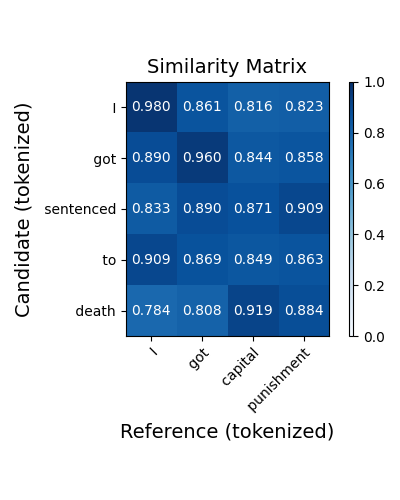

In [ ]:
from IPython.display import Image
Image('/content/out_0.png')

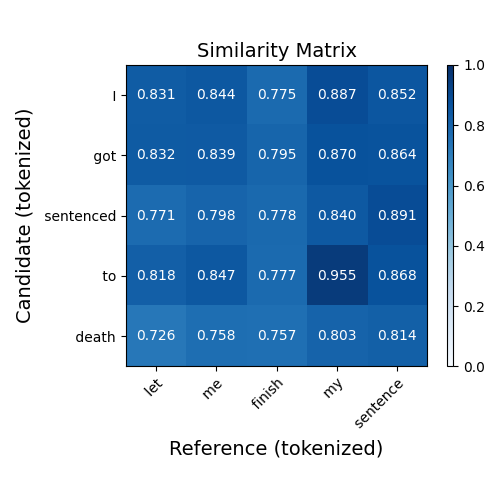

In [ ]:
Image('/content/out_1.png')

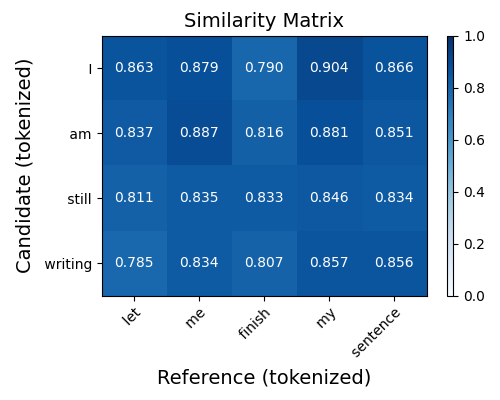

In [ ]:
Image('/content/out_2.png')

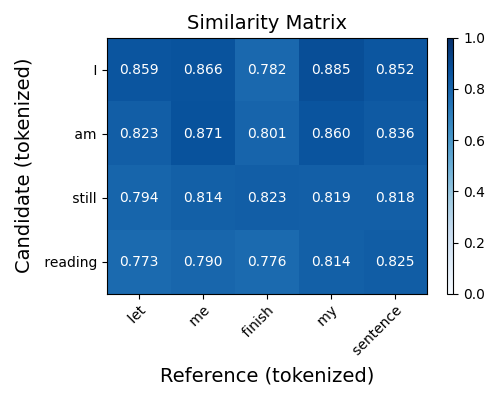

In [ ]:
Image('/content/out_3.png')